In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#figure 1
df = pd.read_excel('age1xyz.xlsx')
df2 = pd.read_excel('age1.xlsx')
df_sex = pd.read_excel('sex1.xlsx')

-0.6112994350282486
1.5789473684210527 38.75636185272544 -35.59846711588333


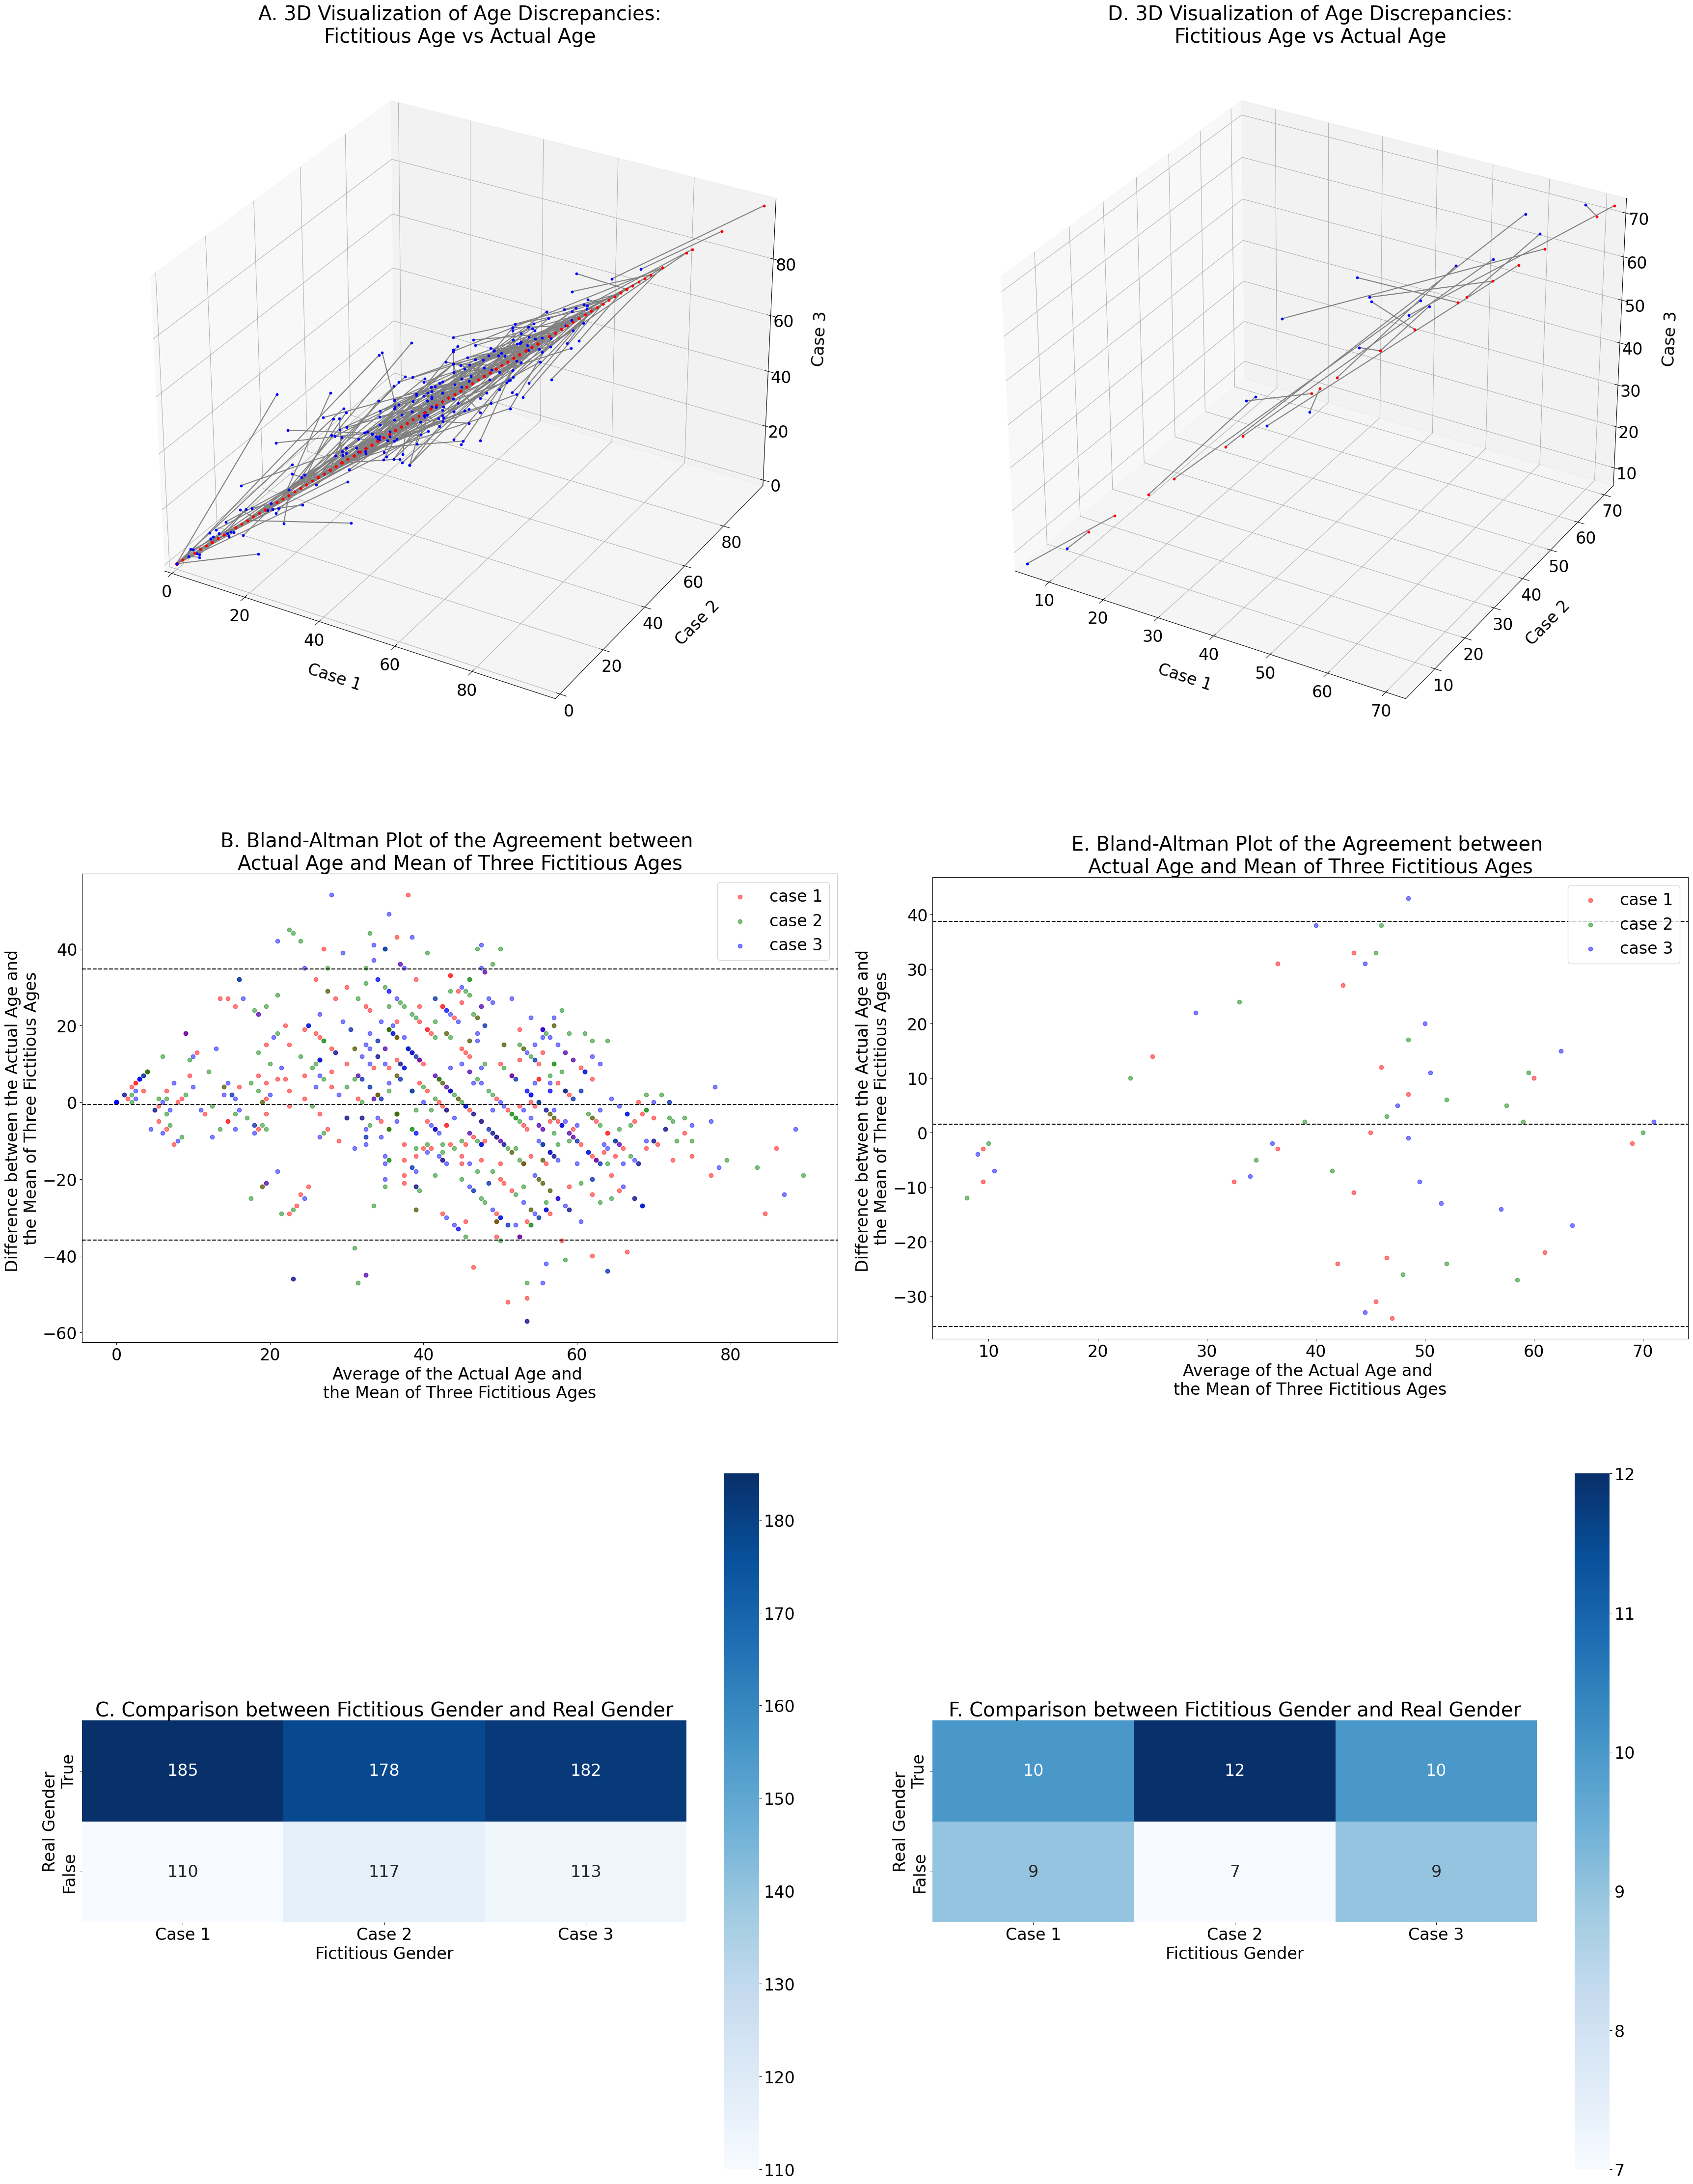

In [121]:
df = pd.read_excel('age1xyz.xlsx')
df2 = pd.read_excel('age1.xlsx')
df_sex = pd.read_excel('sex1.xlsx')

plt.rcParams["figure.figsize"] = [35, 45]  # 图像大小，单位是英寸
plt.rcParams["font.size"] = 24  # 字体大小，单位是点

fig = plt.figure()

# 第一个图
ax = fig.add_subplot(3, 2, 1, projection='3d')
#ax.view_init(azim=0)  # 改变视角，适应更多的数据
#ax.dist = 10
for i in range(df.shape[0]):
    ax.scatter(df.iloc[i]['x1'], df.iloc[i]['y1'], df.iloc[i]['z1'], c='b',s=10)
    ax.scatter(df.iloc[i]['x2'], df.iloc[i]['y2'], df.iloc[i]['z2'], c='r',s=10)
    ax.plot([df.iloc[i]['x1'], df.iloc[i]['x2']], [df.iloc[i]['y1'], df.iloc[i]['y2']], 
            [df.iloc[i]['z1'], df.iloc[i]['z2']], 'gray')

ax.set_xlim([df[['x1', 'x2']].min().min(), df[['x1', 'x2']].max().max()])
ax.set_ylim([df[['y1', 'y2']].min().min(), df[['y1', 'y2']].max().max()])
ax.set_zlim([df[['z1', 'z2']].min().min(), df[['z1', 'z2']].max().max()])

ax.set_xlabel('Case 1',labelpad=25)
ax.set_ylabel('Case 2',labelpad=25)
ax.set_zlabel('Case 3',labelpad=25)
ax.set_title('A. 3D Visualization of Age Discrepancies:\nFictitious Age vs Actual Age')

# 第二个图
ax = fig.add_subplot(3, 2, 3)
ax.set_aspect(0.5)
df2['mean'] = df2[['m1', 'm2', 'm3']].mean(axis=1)

# 计算差异和平均值
for i in range(1, 4):
    df2['diff{}'.format(i)] = df2['m{}'.format(i)] - df2['standard']
    df2['mean{}'.format(i)] = (df2['m{}'.format(i)] + df2['standard']) / 2

# Bland-Altman图的颜色
colors = ['red', 'green', 'blue']
labels = ['case 1', 'case 2', 'case 3'] 

# 绘制Bland-Altman图
for i, color, label in zip(range(1, 4), colors, labels):
    ax.scatter(df2['mean{}'.format(i)], df2['diff{}'.format(i)], color=color, alpha=0.5, label=label)

# 计算总体平均差值和差值的标准差
mean_diff = df2[['diff1', 'diff2', 'diff3']].values.flatten().mean()
std_diff = df2[['diff1', 'diff2', 'diff3']].values.flatten().std()

# 添加平均差值线和差值±1.96标准差的线
ax.axhline(mean_diff, color='black', linestyle='--')
ax.axhline(mean_diff + 1.96 * std_diff, color='black', linestyle='--')
ax.axhline(mean_diff - 1.96 * std_diff, color='black', linestyle='--')
ax.set_title('B. Bland-Altman Plot of the Agreement between \nActual Age and Mean of Three Fictitious Ages')
ax.set_xlabel('Average of the Actual Age and \nthe Mean of Three Fictitious Ages')
ax.set_ylabel('Difference between the Actual Age and \nthe Mean of Three Fictitious Ages')
ax.legend()
print(mean_diff)
#三个图
df_sex.columns = ['Real Gender', 'Case 1', 'Case 2', 'Case 3']
comparison_df = df_sex.iloc[:, 1:] == df_sex['Real Gender'].values[:, np.newaxis]
counts_df = comparison_df.apply(pd.Series.value_counts).fillna(0)
ax = fig.add_subplot(3, 2, 5)
#ax.figsize=(5, 5)
ax.set_aspect(0.5)
sns.heatmap(counts_df, annot=True, cmap='Blues', fmt='g', cbar=True)
ax.set_xlabel('Fictitious Gender')
ax.set_ylabel('Real Gender')
ax.set_title('C. Comparison between Fictitious Gender and Real Gender')
#ax.figure.colorbar(ax=ax,aspect = 20,shrink = 0.5)
#plt.tight_layout()
#plt.savefig('output.pdf', dpi=600, format='pdf')
#plt.show()


df = pd.read_excel('age2xyz.xlsx')
df2 = pd.read_excel('age2.xlsx')
df_sex = pd.read_excel('sex2.xlsx')

# 第一个图
ax = fig.add_subplot(3, 2, 2, projection='3d')
#ax.view_init(azim=0)  # 改变视角，适应更多的数据
#ax.dist = 10
for i in range(df.shape[0]):
    ax.scatter(df.iloc[i]['x1'], df.iloc[i]['y1'], df.iloc[i]['z1'], c='b',s=10)
    ax.scatter(df.iloc[i]['x2'], df.iloc[i]['y2'], df.iloc[i]['z2'], c='r',s=10)
    ax.plot([df.iloc[i]['x1'], df.iloc[i]['x2']], [df.iloc[i]['y1'], df.iloc[i]['y2']], 
            [df.iloc[i]['z1'], df.iloc[i]['z2']], 'gray')

ax.set_xlim([df[['x1', 'x2']].min().min(), df[['x1', 'x2']].max().max()])
ax.set_ylim([df[['y1', 'y2']].min().min(), df[['y1', 'y2']].max().max()])
ax.set_zlim([df[['z1', 'z2']].min().min(), df[['z1', 'z2']].max().max()])

ax.set_xlabel('Case 1',labelpad=25)
ax.set_ylabel('Case 2',labelpad=25)
ax.set_zlabel('Case 3',labelpad=25)
ax.set_title('D. 3D Visualization of Age Discrepancies:\nFictitious Age vs Actual Age')

# 第二个图
ax = fig.add_subplot(3, 2, 4)
ax.set_aspect(0.5)
df2['mean'] = df2[['m1', 'm2', 'm3']].mean(axis=1)

# 计算差异和平均值
for i in range(1, 4):
    df2['diff{}'.format(i)] = df2['m{}'.format(i)] - df2['standard']
    df2['mean{}'.format(i)] = (df2['m{}'.format(i)] + df2['standard']) / 2

# Bland-Altman图的颜色
colors = ['red', 'green', 'blue']
labels = ['case 1', 'case 2', 'case 3'] 

# 绘制Bland-Altman图
for i, color, label in zip(range(1, 4), colors, labels):
    ax.scatter(df2['mean{}'.format(i)], df2['diff{}'.format(i)], color=color, alpha=0.5, label=label)

# 计算总体平均差值和差值的标准差
mean_diff = df2[['diff1', 'diff2', 'diff3']].values.flatten().mean()
std_diff = df2[['diff1', 'diff2', 'diff3']].values.flatten().std()

# 添加平均差值线和差值±1.96标准差的线
ax.axhline(mean_diff, color='black', linestyle='--')
ax.axhline(mean_diff + 1.96 * std_diff, color='black', linestyle='--')
ax.axhline(mean_diff - 1.96 * std_diff, color='black', linestyle='--')
ax.set_title('E. Bland-Altman Plot of the Agreement between \nActual Age and Mean of Three Fictitious Ages')
ax.set_xlabel('Average of the Actual Age and \nthe Mean of Three Fictitious Ages')
ax.set_ylabel('Difference between the Actual Age and \nthe Mean of Three Fictitious Ages')
ax.legend()
print(mean_diff,mean_diff + 1.96 * std_diff,mean_diff - 1.96 * std_diff)
#三个图
df_sex.columns = ['Real Gender', 'Case 1', 'Case 2', 'Case 3']
comparison_df = df_sex.iloc[:, 1:] == df_sex['Real Gender'].values[:, np.newaxis]
counts_df = comparison_df.apply(pd.Series.value_counts).fillna(0)
ax = fig.add_subplot(3, 2, 6)
#ax.figsize=(5, 5)
ax.set_aspect(0.5)
sns.heatmap(counts_df, annot=True, cmap='Blues', fmt='g', cbar=True)
ax.set_xlabel('Fictitious Gender')
ax.set_ylabel('Real Gender')
ax.set_title('F. Comparison between Fictitious Gender and Real Gender')
#ax.figure.colorbar(ax=ax,aspect = 20,shrink = 0.5)
plt.tight_layout()
plt.savefig('output2.pdf', dpi=600, format='pdf')
plt.show()

